# Moving Window Function

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## The Shift function let's you shift a time series forward or backward in time

Data points in a time series relate to each other; they are not independent. This means we can compare them and relate them. One way to do this is to look at how the data points change. For example we can 'difference' a time series.

In [2]:
ts = pd.Series(data=np.random.randn(10), index=pd.date_range('1/1/2018', periods=10, freq='D'))
ts

2018-01-01   -0.374313
2018-01-02   -1.821555
2018-01-03   -0.646702
2018-01-04    0.828974
2018-01-05   -2.277236
2018-01-06    0.571556
2018-01-07   -0.755494
2018-01-08    0.060102
2018-01-09    1.442029
2018-01-10   -0.839211
Freq: D, dtype: float64

We can 'difference' or 'lag' a time series by using the `.shift()` method, which by default shifts the time series forward by one observation (in this case one day):

In [3]:
ts_lagged = ts.shift()
ts_lagged

2018-01-01         NaN
2018-01-02   -0.374313
2018-01-03   -1.821555
2018-01-04   -0.646702
2018-01-05    0.828974
2018-01-06   -2.277236
2018-01-07    0.571556
2018-01-08   -0.755494
2018-01-09    0.060102
2018-01-10    1.442029
Freq: D, dtype: float64

/Users/Malte/anaconda/envs/PythonStandard1/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


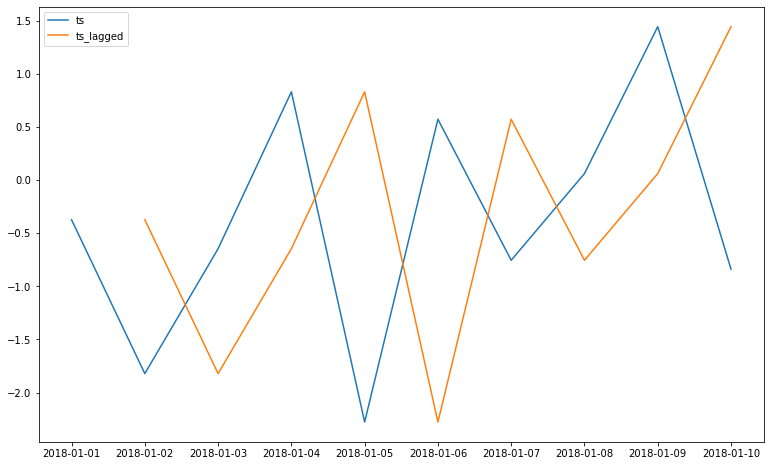

In [4]:
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(ts, label='ts')
ax.plot(ts_lagged, label='ts_lagged')
ax.legend();

Of course I can also shift by a specified time period, for example by 2 days:

In [5]:
ts_lagged_2 = ts.shift(2)
ts_lagged_2

2018-01-01         NaN
2018-01-02         NaN
2018-01-03   -0.374313
2018-01-04   -1.821555
2018-01-05   -0.646702
2018-01-06    0.828974
2018-01-07   -2.277236
2018-01-08    0.571556
2018-01-09   -0.755494
2018-01-10    0.060102
Freq: D, dtype: float64

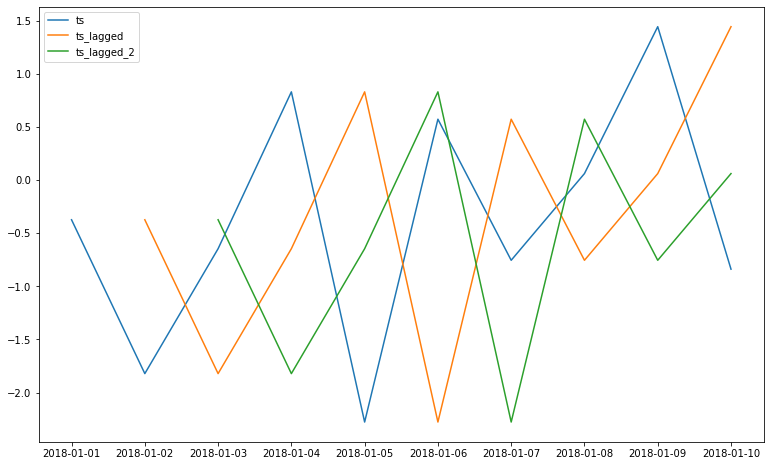

In [6]:
ax.plot(ts_lagged_2, label='ts_lagged_2')
ax.legend()
fig

If you want to shift the time series by a different frequency then the one predefined by the index we can use `.resample()` and the `.shift()`:

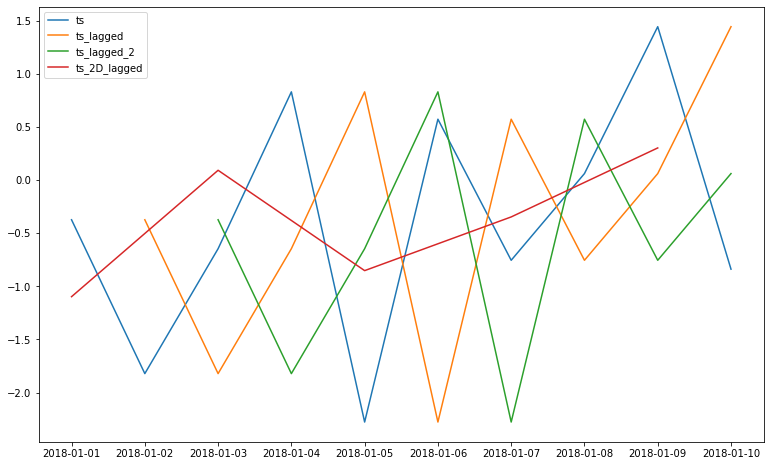

In [7]:
ts_hourly_lagged = ts.resample('2D').mean()
ts_hourly_lagged
ax.plot(ts_hourly_lagged, label='ts_2D_lagged')
ax.legend()
fig

Furthermore we can also shift the time series backwards in time instead of into the future / forward in time, we just have to use negative values:

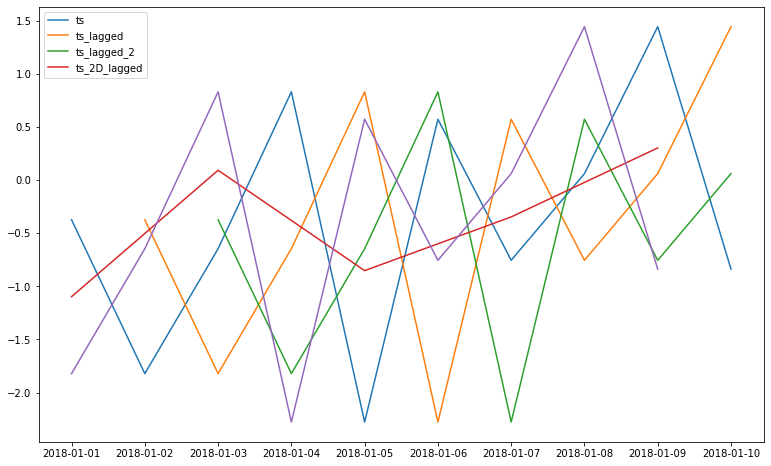

In [8]:
ts_lagged_backwards = ts.shift(-1)
ax.plot(ts_lagged_backwards, label='ts_lagged_backwards')
fig

## Moving Functions give you moving aggregate measures on time series

First, let's create a random DataFrame:

In [9]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2018', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2018-07-01 00:00:00,-0.689440,-1.568205,-0.241485
2018-07-01 00:00:01,-1.567912,-0.711199,1.880672
2018-07-01 00:00:02,-0.698051,-0.068643,-1.636501
2018-07-01 00:00:03,-1.865702,1.555624,-1.536161
2018-07-01 00:00:04,0.340402,-0.774406,0.514203


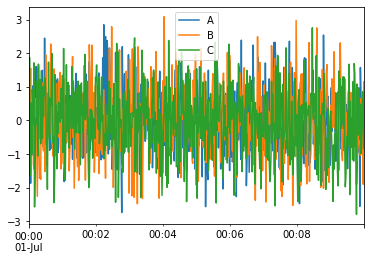

In [10]:
df.plot();

We can now create a rolling window with the `.rolling()` method. The `window` argument thereby specifies the number of periods thare are aggregated for one window. In our case the period is seconds, since whe specified the time series this way:

In [11]:
r = df.rolling(window = 10)
r

Rolling [window=10,center=False,axis=0]

The `rolling` method in itself only returns a Rolling object. Similarly to the `resample()` you now also have to specify what to do with the created windows. We can for example take the rolling mean with the `.mean()` object:

In [12]:
r_mean = r.mean()
r_mean.head(12)

,A,B,C
2018-07-01 00:00:00,NaN,NaN,NaN
2018-07-01 00:00:01,NaN,NaN,NaN
2018-07-01 00:00:02,NaN,NaN,NaN
2018-07-01 00:00:03,NaN,NaN,NaN
2018-07-01 00:00:04,NaN,NaN,NaN
2018-07-01 00:00:05,NaN,NaN,NaN
2018-07-01 00:00:06,NaN,NaN,NaN
2018-07-01 00:00:07,NaN,NaN,NaN
2018-07-01 00:00:08,NaN,NaN,NaN
2018-07-01 00:00:09,-0.484275,-0.426937,0.101767


Now let's plot the initial DataFrame and the rolling mean togehter:

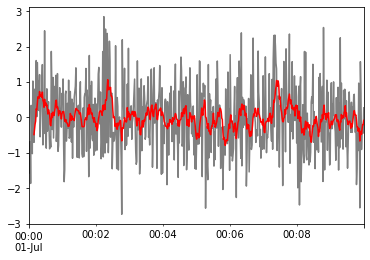

In [13]:
df.A.plot(color = 'grey')
r_mean.A.plot(color = 'r');

There is a large amount of aggregation function to choose from for using `.rolling()`.

For example `.agg()` `.apply()` `.sum()` `.count()` `.mean()` `.median()` `.var()` and many more. Here is one more example using the `.agg()` method:

In [14]:
r.agg(['sum', 'count']).head(12)

A               B               C      
                          sum count       sum count       sum count
2018-07-01 00:00:00       NaN   1.0       NaN   1.0       NaN   1.0
2018-07-01 00:00:01       NaN   2.0       NaN   2.0       NaN   2.0
2018-07-01 00:00:02       NaN   3.0       NaN   3.0       NaN   3.0
2018-07-01 00:00:03       NaN   4.0       NaN   4.0       NaN   4.0
2018-07-01 00:00:04       NaN   5.0       NaN   5.0       NaN   5.0
2018-07-01 00:00:05       NaN   6.0       NaN   6.0       NaN   6.0
2018-07-01 00:00:06       NaN   7.0       NaN   7.0       NaN   7.0
2018-07-01 00:00:07       NaN   8.0       NaN   8.0       NaN   8.0
2018-07-01 00:00:08       NaN   9.0       NaN   9.0       NaN   9.0
2018-07-01 00:00:09 -4.842753  10.0 -4.269367  10.0  1.017674  10.0
2018-07-01 00:00:10 -3.356681  10.0 -2.578159  10.0 -1.312960  10.0
2018-07-01 00:00:11 -1.885936  10.0 -2.807113  10.0 -4.792793  10.0

With the `.apply()` method you can also specify your own custom aggregation function:

In [15]:
r.apply(lambda x: sum(x[0:4]) / sum(x[5:9]), raw=True).head(12)

,A,B,C
2018-07-01 00:00:00,NaN,NaN,NaN
2018-07-01 00:00:01,NaN,NaN,NaN
2018-07-01 00:00:02,NaN,NaN,NaN
2018-07-01 00:00:03,NaN,NaN,NaN
2018-07-01 00:00:04,NaN,NaN,NaN
2018-07-01 00:00:05,NaN,NaN,NaN
2018-07-01 00:00:06,NaN,NaN,NaN
2018-07-01 00:00:07,NaN,NaN,NaN
2018-07-01 00:00:08,NaN,NaN,NaN
2018-07-01 00:00:09,-14.091983,0.626732,-4.753447


Let's now combine our knowledge of resampling with this new knowledge about moving window functions. Say we have a DataFrame with daily data. We would now want to create a moving window with a custom function based on monthly data:

In [16]:
df_2 = pd.DataFrame(data=np.random.randn(200, 2), index=pd.date_range('01/01/2018', periods=200, freq='D' ))
df_2.columns = ['A', 'B']
df_2.head()

,A,B
2018-01-01,0.174965,1.052822
2018-01-02,-0.676879,0.028111
2018-01-03,0.044130,-2.006233
2018-01-04,0.678811,-1.083315
2018-01-05,-1.008821,-1.046271


In [17]:
df_2.resample('M').mean().rolling(window=3).apply(lambda x: x[-1] - x[0], raw=False)

,A,B
2018-01-31,NaN,NaN
2018-02-28,NaN,NaN
2018-03-31,-0.032274,-0.113923
2018-04-30,-0.263610,-0.000091
2018-05-31,-0.050735,0.488275
2018-06-30,0.488588,-0.432713
2018-07-31,0.522513,-0.126088


## Expanding Windows

The pandas expanding window function works similarly to the moving window function, except for the fact that the aggregation function is not applied to a window of data points, but always on the whole past data. The window thus expands with every new data point:

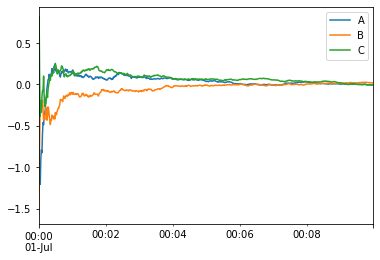

In [18]:
df.expanding(min_periods=1).mean().plot();

## Exponential moving average

Instead of a simple moving average (SMA), pandas also allows to calulate an exponentially weighted moving average (EMA) with the `.ewm()` method:

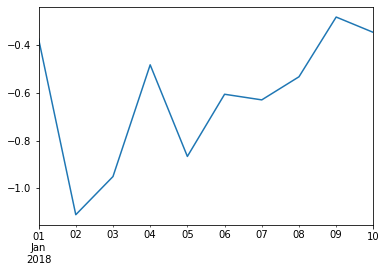

In [19]:
ts.ewm(span=60, min_periods = 0, adjust=True).mean().plot()